In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


conclusion:

In [8]:
df.drop(columns = ['Cabin'],inplace=True)

In [9]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

In [10]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [11]:
df['Embarked'].isnull().sum()

np.int64(2)

Replacing null values with Mode

In [12]:
df['Embarked'].fillna('S',inplace=True)

/tmp/ipython-input-3895404187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [13]:
df['Embarked'].isnull().sum()

np.int64(0)

In [14]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [15]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [16]:
df1 = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [17]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [18]:
#Checking type of distribution

missing_age = df[df['Age'].isnull()]
not_missing_age = df[df['Age'].notnull()]

# Compare means or distributions of other variables
print(missing_age['Sex'].value_counts(normalize=True))  #normalize = True gives percentage else it will give count
print(not_missing_age['Sex'].value_counts(normalize=True))


Sex
male      0.700565
female    0.299435
Name: proportion, dtype: float64
Sex
male      0.634454
female    0.365546
Name: proportion, dtype: float64


In [19]:
df1['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [20]:
from scipy.stats import chi2_contingency
import pandas as pd

# Example: build a contingency table
table = pd.crosstab(df['Sex'], df['Age'].isnull())
chi2, p, dof, expected = chi2_contingency(table)

print(f"p-value: {p}")


p-value: 0.11869638287527425


P >= 0.05 so Sex and Age column is independent so our data is MCAR

In [21]:
from sklearn.impute import KNNImputer
import pandas as pd

# select numeric features (KNNImputer works only on numeric columns)
numeric_cols = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

imputer = KNNImputer(n_neighbors=5)  # you can tune neighbors
df1[numeric_cols] = imputer.fit_transform(df1[numeric_cols])


In [22]:
#Converting the target feature also changing datatypes of some columns

df1['Survived'] = df1['Survived'].astype('category')
df1['Pclass'] = df1['Pclass'].astype('category')
df1['Embarked_Q'] = df1['Embarked_Q'].astype('category')
df1['Embarked_S'] = df1['Embarked_S'].astype('category')
df1['Age'] = df1['Age'].astype('int')

In [23]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S']

X = df1[cols]
y = df1['Survived']

In [24]:
#Splitting train test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
298,1.0,44,0.0,0.0,30.5000,True,False,True
884,3.0,25,0.0,0.0,7.0500,True,False,True
247,2.0,24,0.0,2.0,14.5000,False,False,True
478,3.0,22,0.0,0.0,7.5208,True,False,True
305,1.0,0,1.0,2.0,151.5500,True,False,True
...,...,...,...,...,...,...,...,...
106,3.0,21,0.0,0.0,7.6500,False,False,True
270,1.0,42,0.0,0.0,31.0000,True,False,True
860,3.0,41,2.0,0.0,14.1083,True,False,True
435,1.0,14,1.0,2.0,120.0000,False,False,True


In [26]:
y_train

,Survived
298,1
884,0
247,1
478,0
305,1
...,...
106,1
270,0
860,0
435,1


In [27]:
df['Age'].isnull().sum()

np.int64(177)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df['Sex']

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


Univarte Analysis

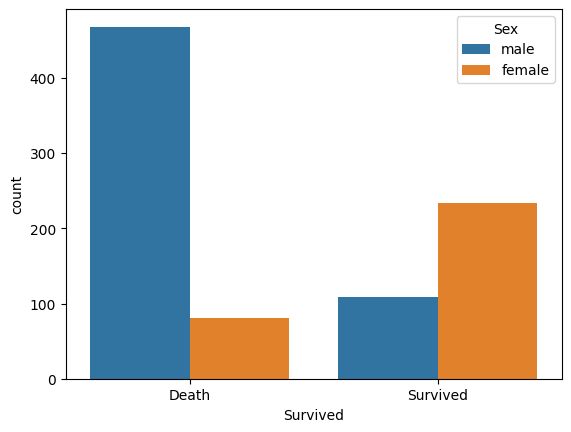

In [31]:
sns.countplot(data=df,x='Survived',hue='Sex')
x = ["Death","Survived"]
plt.xticks([0,1],x)
plt.show()

In [32]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
pip install ydata-profiling


In [34]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 64.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Observation

In [35]:
#percentage of death

percent = round((df['Survived'].value_counts().values[0]/891)*100)
print(percent)

62


In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [37]:
def objective(trial):
    try:
        classifier_name = trial.suggest_categorical("classifier_name", ["SVM", "RandomForest", "GradientBoosting",])

        if classifier_name == 'SVM':
            c = trial.suggest_float('c', 0.1, 100, log=True)
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
            gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

            model = SVC(C=c, kernel=kernel, gamma=gamma, random_state=42)

        elif classifier_name == 'RandomForest':
            n_estimators = trial.suggest_int('n_estimators', 50, 300)
            max_depth = trial.suggest_int('max_depth', 3, 20)
            min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
            bootstrap = trial.suggest_categorical('bootstrap', [True, False])

            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                bootstrap=bootstrap
            )

        elif classifier_name == 'GradientBoosting':
            n_estimators = trial.suggest_int('n_estimators', 50, 300)
            learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
            min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

            model = GradientBoostingClassifier(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )

        score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
        return score

    except Exception as e:
        print(f"Trial failed due to: {e}")
        return None  # or you can raise optuna.exceptions.TrialPruned()


In [38]:
pip install optuna

In [39]:
import optuna
from optuna.samplers import TPESampler

In [40]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())

[I 2025-10-23 08:37:31,004] A new study created in memory with name: no-name-1c75f1d2-516f-40ad-972a-12f32dd59c0b


In [41]:
study.optimize(objective,n_trials=25)

[I 2025-10-23 08:37:31,542] Trial 0 finished with value: 0.8098546977470744 and parameters: {'classifier_name': 'RandomForest', 'n_estimators': 78, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 9, 'bootstrap': True}. Best is trial 0 with value: 0.8098546977470744.
[I 2025-10-23 08:37:31,611] Trial 1 finished with value: 0.62275279764069 and parameters: {'classifier_name': 'SVM', 'c': 79.50741212155809, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0.8098546977470744.
[I 2025-10-23 08:37:33,668] Trial 2 finished with value: 0.784436903270984 and parameters: {'classifier_name': 'GradientBoosting', 'n_estimators': 279, 'learning_rate': 0.19239216767790282, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8098546977470744.
[I 2025-10-23 08:37:35,484] Trial 3 finished with value: 0.8158539705624906 and parameters: {'classifier_name': 'RandomForest', 'n_estimators': 194, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf'

In [42]:
best_trial = study.best_trial
print(best_trial.params)
print(best_trial.value)

{'classifier_name': 'RandomForest', 'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}
0.8203382754952262


In [44]:
model = RandomForestClassifier(n_estimators = 109,max_depth = 4,min_samples_split = 7,min_samples_leaf = 1,bootstrap = False)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_split=7,
                       n_estimators=109)

In [45]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8295964125560538

In [46]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(model,open(filename,'wb'))